В этой работе вам предстоит исследовать неточности в данных и устранить их. В конце – проанализировать результаты.

Все необходимые этапы предобработки данных описаны в задании, ваша задача – реализовать их.

# Данные

[Monster.com jobs](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data) - датасет о вакансиях, данные в котором намеренно не предобработаны. Есть несколько сомнительных столбцов с 1 уникальным значением, тип работы не стандартизирован, расположение может содержать штат, город и почтовый индекс или только часть из этих данных, или совершенно неясные данные вроде "Contact name Tony Zerio" или "Sr. Process Engineer, Manufacturing", в графе с зарплатой помимо зарплаты есть вещи вроде "Excellent Pay and Incentives" и другие проблемы.

Практически все столбцы в датасете нельзя использовать для анализа без предобработки.

К датасету на kaggle приложен блокнот с примером его очистки. Рекомендуется ознакомиться с ним после выполнения задания, чтобы оценить сходства и различия в подходах.

Целью обработки датасета будем считать использование для многостороннего изучения данных в дальнейшем, то есть мы обработаем данные таким образом чтобы их удобно было использовать для широкого спекра задач анализа данных.

### Изучение датасета

<font color='#830560' size=3>
Чтобы было легче читать, мой текст отличается по цвету от преподавательского.
</font>

In [ ]:
import re
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from warnings import filterwarnings
from google.colab import drive

filterwarnings("ignore")
drive.mount('/content/drive')

Mounted at /content/drive


Загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [ ]:
init_df = pd.read_csv('/content/drive/MyDrive/Вузовское/МЕВД/monster_com-job_sample.csv')
init_df.sample(5)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
2946,United States of America,US,NaN,No,jobs.monster.com,* Responsible for effective management of pati...,Registered Nurse - Centralized Staffing Job in...,"Full Time, Employee","Shreveport, LA 71105",Healthcare Services,http://jobview.monster.com/Registered-Nurse-Ce...,NaN,Medical/Health,c459a7a6a32ab6aa193386b9f47cf23b
11878,United States of America,US,NaN,No,jobs.monster.com,Full Time HR ManagerBrookdale Westlake Village...,Human Resoures Director Job in Westlake,Full Time Employee,"Westlake, OH 44145",Management Consulting Services Healthcare Serv...,http://jobview.monster.com/Human-Resoures-Dire...,NaN,Human Resources,f5296cf627a3e1a0e7e856e8155b5dff
1024,United States of America,US,NaN,No,jobs.monster.com,Job Title: Personal Banker 1Job ID Number: 524...,Personal Banker Job in Dallas,Full Time Employee,"Dallas, TX",Banking,http://jobview.monster.com/personal-banker-1-j...,NaN,Experienced (Non-Manager),54fad7dc272cd90fb651b9782f1d2309
3347,United States of America,US,NaN,No,jobs.monster.com,The founding partners of Northwest Diagnostic ...,Registered Nurse (RN) Job in Houston,Full Time,"Houston, TX 77090",Healthcare Services,http://jobview.monster.com/Registered-Nurse-RN...,NaN,NaN,8cb9d712152260167e5a18320ac3c692
15862,United States of America,US,NaN,No,jobs.monster.com,Drive your Future! Pilot Flying J is committed...,Retail Shift Manager - Restaurant Shift Manage...,NaN,Drive your Future! Pilot Flying J is committed...,Retail,http://jobview.monster.com/retail-shift-manage...,NaN,Sales/Retail/Business Development,fd557eff080ff171942b0624bb543145


**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.

(Таблицу можно представить в виде текстового поля, датафрейма или картинки – формат неважен, важно содержание)

In [ ]:
init_df.dtypes.to_frame('Data type').T

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
Data type,object,object,object,object,object,object,object,object,object,object,object,object,object,object


<font color='#830560' size=3>
Кол-во строк исходной таблицы: 22000, кол-во столбцов: 14. Страна - US. Сайт - jobs.monster.com
</font>

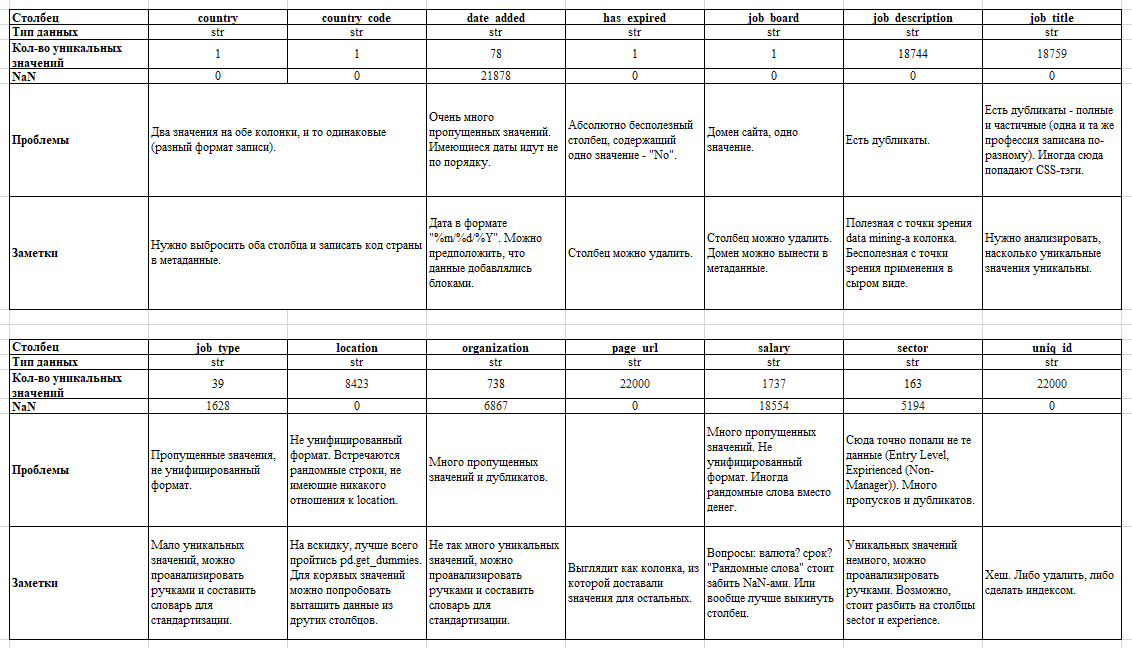

#### Пустые значения

Начнем работу: проанализируем пустые ячейки.
Выясните, в каких столбцах и в каком количестве отсутствуют данные.

> Помимо создания таблички, воспользуйтесь библиотекой `missingno` и визуально оцените количество пропущенных данных.

In [ ]:
init_df.isna().sum().to_frame('Count NaN').T

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
Count NaN,0,0,21878,0,0,0,0,1628,0,6867,0,18554,5194,0


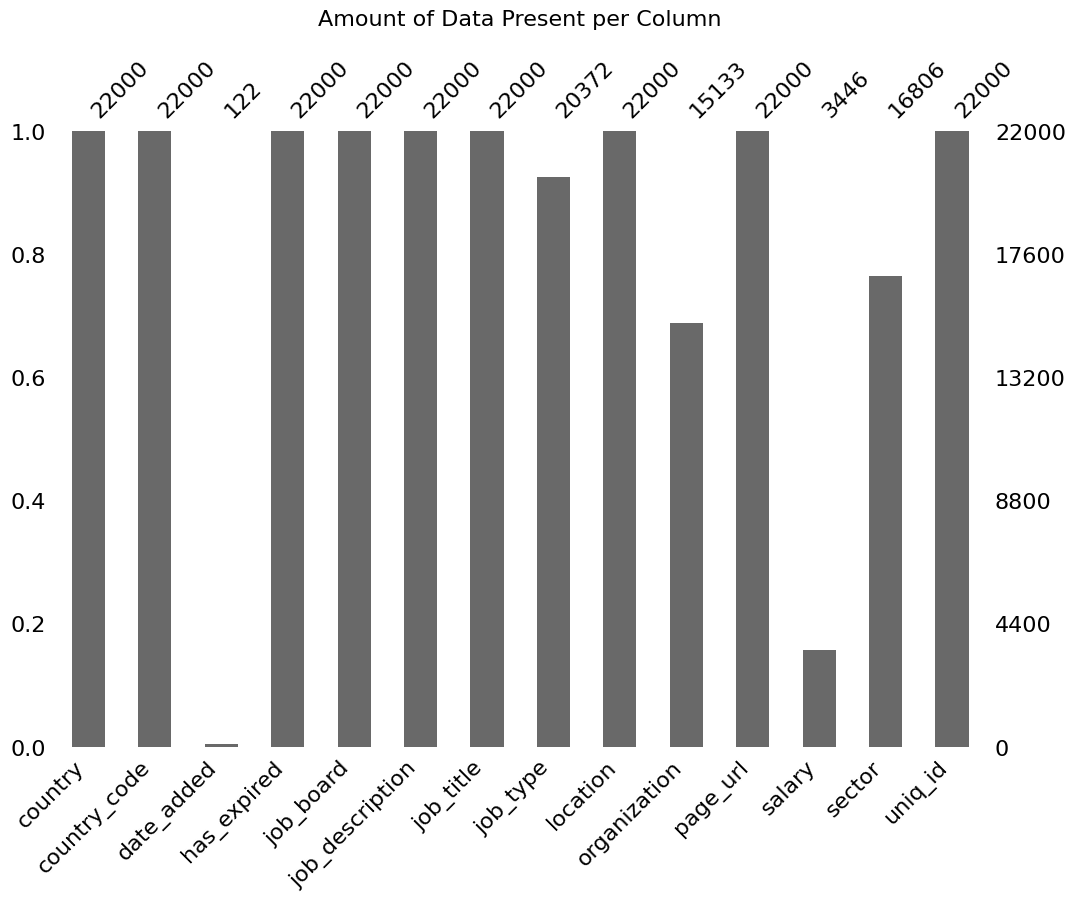

In [ ]:
msno.bar(init_df, figsize=(12, 8))
plt.title('Amount of Data Present per Column\n', fontsize=16)
plt.show()

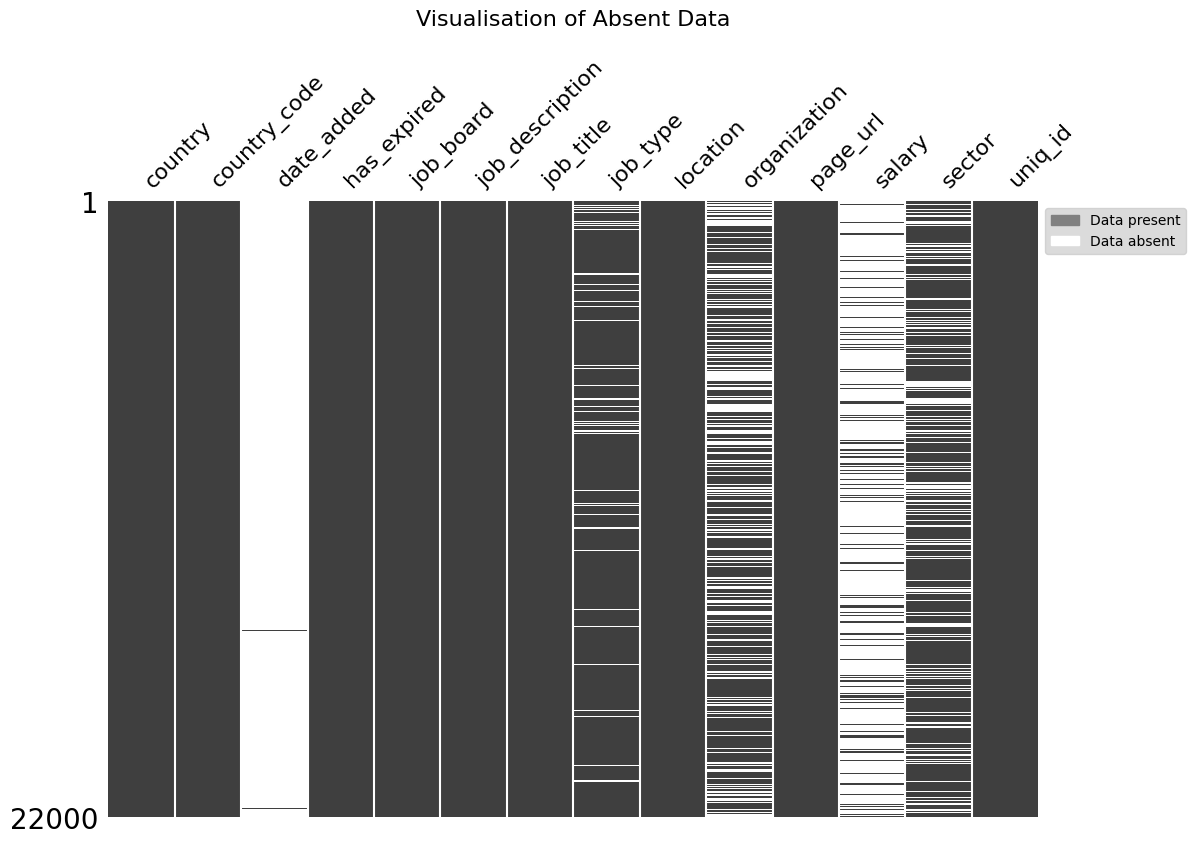

In [ ]:
msno.matrix(init_df, figsize=(12, 8), sparkline=False)
gray_patch = matplotlib.patches.Patch(color='gray', label='Data present')
white_patch = matplotlib.patches.Patch(color='white', label='Data absent')
plt.legend(handles=[gray_patch, white_patch], bbox_to_anchor=[1, 1], facecolor='lightgray')
plt.title('Visualisation of Absent Data\n', fontsize=16)
plt.show()

Проверьте, как изменится размер датасета, если мы примем решение удалить все строки, где есть пустые значения. Сделайте выводы.

<font color='#830560' size=3>
Если удалить все строки, где хотя бы одно пропущенное значение, от датасета не останется ничего. При этом нет ни единой строки, где бы отсутствовали все значения.
</font>

In [ ]:
len(init_df[~((init_df.isna()).any(axis=1))]) 

5

Принимаем решение сохранить как можно больше данных, удалять все – плохой план. Если удалить все, можем потерять важную информацию.

#### Нерелевантные колонки

Оценим, какие столбцы необходимо оставить, а какие можно удалить.
Рассмотрите следующие идеи:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли столбцы, в которых содержатся данные, которые есть еще в каком-то столбце?
3. Какие столбцы содержательно нерелевантны? Обоснуйте.

In [ ]:
init_df.nunique().to_frame('Count unique').T

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
Count unique,1,1,78,1,1,18744,18759,39,8423,738,22000,1737,163,22000


<font color='#830560' size=3>
В столбцах country, country_code, has_expired, job_board встречается всего одно значение. Эти значения можно вынести в метаданные, а сами столбцы удалить. 
</font>

<font color='#830560' size=3>
Столбец country, можно сказать, дублирует country_code, потому что знание одного достаточно, чтобы вычислить второе. Page_url часто содержит информацию о job_title, job_type и location. В целом, page_url выглядит бесполезно, потому что не привносит в данные ничего нового. Кроме того, ссылки не рабочие, поэтому для получения данных их использовать нельзя.
</font>

<font color='#830560' size=3>
Помимо вышесказанного, нерелевантен столбец uniq_id. Его можно использовать в качестве индекса или удалить.
</font>

<font color='#830560' size=3>
Ещё мне не очень нравится столбец date_added. Его нужно проверить. Если все даты идут по порядку или в обратном порядке, то можно предположить, что данные добавлялись блоками, и это будет полезная информация. Иначе - столбец лучше выбросить, потому что в нем слишком много пустых значений.
</font>

In [ ]:
init_df.date_added[~init_df.date_added.isna()]

133      5/10/2016
140      5/13/2016
251       5/9/2016
279      6/10/2016
366       1/2/2017
           ...    
20760    9/27/2016
21342    3/30/2016
21391    3/24/2016
21631     4/4/2016
21696    3/24/2016
Name: date_added, Length: 122, dtype: object

<font color='#830560' size=3>
date_added - бесполезный столбец. Единственная польза от него - если у нас есть две строки, различающиеся только датами, то это две разные строки.
</font>

#### Дублирование данных

Определите столбцы, по которым можно однозначно идентифицировать запись в датасете. Одинаковыми будем считать строки, в которых значения в этих столбцах совпадает.

Удалите одно из двух повторений и сравните, как изменились характеристики датасета.

In [ ]:
init_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   date_added       122 non-null    object
 3   has_expired      22000 non-null  object
 4   job_board        22000 non-null  object
 5   job_description  22000 non-null  object
 6   job_title        22000 non-null  object
 7   job_type         20372 non-null  object
 8   location         22000 non-null  object
 9   organization     15133 non-null  object
 10  page_url         22000 non-null  object
 11  salary           3446 non-null   object
 12  sector           16806 non-null  object
 13  uniq_id          22000 non-null  object
dtypes: object(14)
memory usage: 2.3+ MB


In [ ]:
init_df.drop_duplicates(subset=['date_added', 'job_description', 'job_title', 'job_type', 'location', 'organization', 'salary', 'sector']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20832 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          20832 non-null  object
 1   country_code     20832 non-null  object
 2   date_added       119 non-null    object
 3   has_expired      20832 non-null  object
 4   job_board        20832 non-null  object
 5   job_description  20832 non-null  object
 6   job_title        20832 non-null  object
 7   job_type         19311 non-null  object
 8   location         20832 non-null  object
 9   organization     14227 non-null  object
 10  page_url         20832 non-null  object
 11  salary           3299 non-null   object
 12  sector           15909 non-null  object
 13  uniq_id          20832 non-null  object
dtypes: object(14)
memory usage: 2.4+ MB


<font color='#830560' size=3>
В датасете оказалось около 5% дубликатов. И мне крайне интересно, почему меньший датафрейм занимает больше места...
</font>

### Обработка датасета

#### Первичная обработка

Выше мы оценили, какие есть проблемы с дубликатами и отсутствующими значениями.

Первым делом устраним их. Удалим все, что можно удалить без потери данных. На всякий случай сохраним копию датасета. В конце нам понадобится оценивать результаты. Она пригодится.

In [ ]:
# Копия
changed_df = init_df.copy()

In [ ]:
# Удаление нерелевантных столбцов
changed_df.drop(columns=['country', 'country_code', 'has_expired', 'job_board', 'page_url', 'uniq_id'], inplace=True)

In [ ]:
# Удаление дубликатов
changed_df.drop_duplicates(subset=['date_added', 'job_description', 'job_title', 'job_type', 'location', 'organization', 'salary', 'sector'], ignore_index=True, inplace=True)

In [ ]:
# Удаление строк или столбцов с пустыми ячейками
changed_df.drop(columns=['date_added'], inplace=True)

In [ ]:
changed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20832 entries, 0 to 20831
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_description  20832 non-null  object
 1   job_title        20832 non-null  object
 2   job_type         19311 non-null  object
 3   location         20832 non-null  object
 4   organization     14227 non-null  object
 5   salary           3299 non-null   object
 6   sector           15909 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


#### Обработка колонки location

In [ ]:
# Чтобы не таскать за собой всю таблицу
location_col = changed_df.location

<font color='#830560' size=3>
В "адрес" иногда попадают слишком длинные значения, скопированные из других столбцов. По этой причине все подозрительно длинные адреса имеет смысл отбросить.
</font>

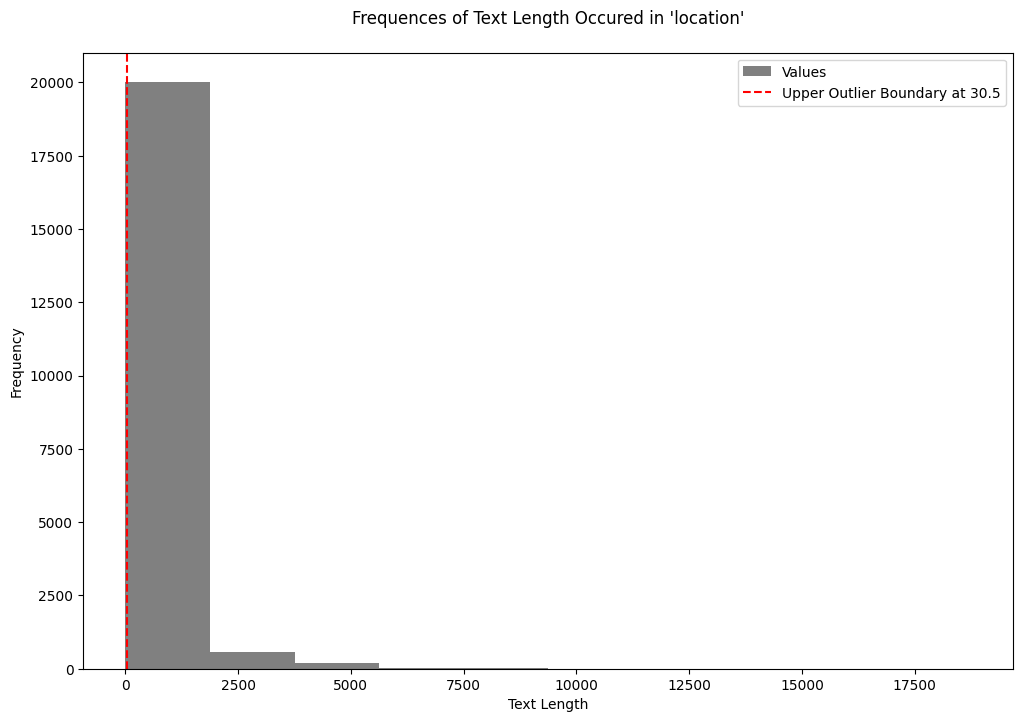

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_data = location_col.apply(lambda text: len(text))
plot_data.plot(ax=ax, kind='hist', bins=10, ylabel='Frequency', color='gray', label='Values')
iqr = plot_data.quantile(0.75) - plot_data.quantile(0.25)
boundary = plot_data.quantile(0.75) + 1.5 * iqr
ax.axvline(boundary, 0, 1, color='red', ls='--', label=f'Upper Outlier Boundary at {boundary}')
plt.title("Frequences of Text Length Occured in 'location'\n")
plt.xlabel('Text Length')
plt.legend()
plt.show()

Выясните, какие форматы значений есть в столбце `location`. Сделайте выводы.

<font color='#830560' size=3>
Форматы адресов:
<li> Город + код штата + индекс; </li>
<li> Город + код штата; </li>
<li> Только индекс; </li>
<li> Только код штата; </li>
<li> Город + индекс; </li>
</font>

На этом этапе у вас должно получиться минимум 2 валидных формата данных (город+код штата, город+код штата+индекс). Напишите регулярные выражения или воспользуйтесь известными вам методами обработки текста для поиска этих форматов. Если, на ваш взгляд, стоит выделить больше форматов, сделайте это.

In [ ]:
# Не все штаты лежат в качестве аббревиатур, надо исправить
us_state_to_abbrev = {"Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO", "Connecticut": "CT",
"Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
"Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
"Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
"North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
"South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV",
"Wisconsin": "WI", "Wyoming": "WY", "District of Columbia": "DC", "American Samoa": "AS", "Guam": "GU", "Northern Mariana Islands": "MP",
"Puerto Rico": "PR", "United States Minor Outlying Islands": "UM", "U.S. Virgin Islands": "VI"}

for us_state, abbrev in us_state_to_abbrev.items():
    location_col = location_col.str.replace(us_state, abbrev)

# Разовое удаление лишних пробелов 
location_col = location_col.apply(lambda text: re.sub(r'\s+', ' ', text).strip()) 

In [ ]:
# Убрать слишком длинные строки (нерелевантная информация, которую лучше сразу отфильтровать)
too_long_ones = location_col[location_col.str.fullmatch(r'(.{30,})')]
location_col = location_col[~location_col.isin(too_long_ones)]

# Убрать строки, содержащие "Contact name" (нерелевантная информация, которую лучше сразу отфильтровать)
contact_names = location_col[location_col.str.contains(r'Contact (N|n)ame')]
location_col = location_col[~location_col.isin(contact_names)]

# Город + код штата + индекс
city_state_index = location_col[location_col.str.fullmatch(r'[A-Za-z .\-/]+(?:(?:\s*,\s*)|\s)[A-Za-z]{2}(?:(?:\s*,\s*)|\s)\d{5}')]
location_col = location_col[~location_col.isin(city_state_index)]

# Город + код штата
city_state = location_col[location_col.str.fullmatch(r'[A-Za-z .\-/]+(?:(?:\s*,\s*)|\s)[A-Za-z]{2}')]
location_col = location_col[~location_col.isin(city_state)]

# Индекс
index_only = location_col[location_col.str.fullmatch(r'\d{5}')]
location_col = location_col[~location_col.isin(index_only)]

# Код штата
state_only = location_col[location_col.str.fullmatch(r'[A-Za-z]{2}')]
location_col = location_col[~location_col.isin(state_only)]

# Город + индекс
city_index = location_col[location_col.str.fullmatch(r'[A-Za-z .\-/]+\d{5}')]

# Всё, что выглядит как невалидный адрес, включая отброшенные изначально строки
other = pd.concat([location_col[~location_col.isin(city_index)], too_long_ones, contact_names])

Визуализируйте количество найденных форматов данных на столбиковой или круговой диаграмме.

In [ ]:
plot_data = pd.DataFrame({'city_state_index': len(city_state_index), 'city_state': len(city_state), 
                          'index_only': len(index_only), 'state_only': len(state_only),
                          'city_index': len(city_index), 'other': len(other)},
                          index=[0]).T.sort_values(0, ascending=False).T

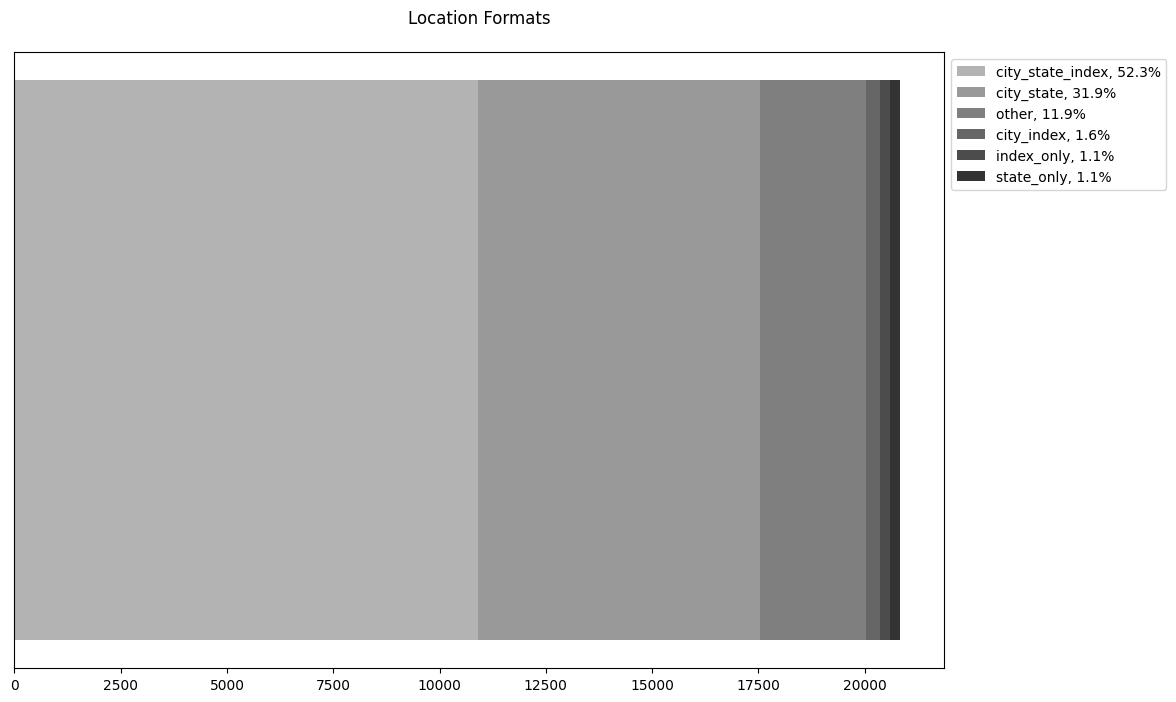

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", 
       plt.cm.binary(np.linspace(0.3, 0.8, len(plot_data.columns))))
plot_data.plot(ax=ax, kind='barh', stacked=True, cmap=cmap)
labels = [f'{l}, {s:0.1f}%' for l, s in zip(plot_data.columns, 100 * plot_data.values[0] / sum(plot_data.values[0]))]
ax.legend(bbox_to_anchor=[1, 1], labels=labels)
plt.title("Location Formats\n")
ax.get_yaxis().set_visible(False) 
plt.axis('tight')
plt.show()

Строки с невалидными данными выделяем в отдельный датасет. Остальные данные локаций разделяем на 3 колонки: город, штат, индекс. Колонка индекс будет содержать пустые значения.

In [ ]:
# Добавление нужных колонок в пустом виде
changed_df['city'] = np.nan
changed_df['state'] = np.nan
changed_df['index'] = np.nan

In [ ]:
# Проход по всем найденным блокам с вытаскиванием значений и занесением их в таблицу
temp_df = city_state_index.str.extract(r'([A-Za-z .\-/]+)(?:(?:\s*,\s*)|\s)([A-Za-z]{2})(?:(?:\s*,\s*)|\s)(\d{5})')
changed_df.loc[temp_df.index, 'city'] = temp_df[0]
changed_df.loc[temp_df.index, 'state'] = temp_df[1].apply(lambda text: text.upper())
changed_df.loc[temp_df.index, 'index'] = temp_df[2]

temp_df = city_state.str.extract(r'([A-Za-z .\-/]+)(?:(?:\s*,\s*)|\s)([A-Za-z]{2})')
changed_df.loc[temp_df.index, 'city'] = temp_df[0]
changed_df.loc[temp_df.index, 'state'] = temp_df[1].apply(lambda text: text.upper())

temp_df = index_only.str.extract(r'(\d{5})')
changed_df.loc[temp_df.index, 'index'] = temp_df[0]

temp_df = state_only.str.extract(r'([A-Za-z]{2})')
changed_df.loc[temp_df.index, 'state'] = temp_df[0].apply(lambda text: text.upper())

temp_df = city_index.str.extract(r'([A-Za-z .\-/]+)(\d{5})')
changed_df.loc[temp_df.index, 'city'] = temp_df[0]
changed_df.loc[temp_df.index, 'index'] = temp_df[1]

Рассмотрите отложенную часть выборки и сделайте выводы о возможности извлечь из данных город, штат и индекс. Извлеките все, что возможно. Что невозможно – оставьте пустым.

In [ ]:
other.value_counts()[other.value_counts() >= 5]

Location:                                             133
Multiple locations                                     22
DallasTX                                               17
Position Information                                   17
BostonMA                                               15
84 Lumber                                              14
Home Based                                             10
ChicagoIL                                              10
Contact name Lisa van Horne                             9
AtlantaGA                                               9
Full Time Employee                                      9
ATS                                                     8
Contact name Justin Kim                                 8
Job location not provided                               8
Contact name Daniel Nadruz                              7
Contact name Kristina Ensslen                           6
Owning your own business has never been this easy!      6
Contact name N

<font color='#830560' size=3>
Можно вытащить DallasTX, BostonMA, ChicagoIL, AtlantaGA, Toronto.
</font>

In [ ]:
for name in ['DallasTX', 'BostonMA', 'ChicagoIL', 'AtlantaGA']:
    temp_df = other[other == name]
    changed_df.loc[temp_df.index, 'city'] = name[:-2]
    changed_df.loc[temp_df.index, 'state'] = name[-2:]

changed_df.loc[other[other == 'Toronto'].index, 'city'] = 'Toronto'
changed_df.loc[other[other == 'Toronto'].index, 'state'] = 'CA'

In [ ]:
# Sanity check - если адрес имеет несуществующий код штата, значит, туда попал мусор
not_ok = changed_df[~(changed_df.state.isin(us_state_to_abbrev.values())|changed_df.state.isna())]
changed_df.loc[not_ok.index, 'city'] = np.nan
changed_df.loc[not_ok.index, 'state'] = np.nan
changed_df.loc[not_ok.index, 'index'] = np.nan

#### Обработка колонки salary

In [ ]:
# Чтобы не таскать всю таблицу за собой
salary_col = changed_df.salary[~changed_df.salary.isna()] 
len(salary_col)

3299

<font color='#830560' size=3>
Все числа указаны в долларах (есть один-единственный выброс с евро, его проще не учитывать), десятичный разделитель - точка, есть лишние пробелы. От избыточной информации можно избавиться. 
</font>

In [ ]:
print(len(salary_col[salary_col.str.contains('€')]))
salary_col = salary_col[~salary_col.str.contains('€')]

1


<font color='#830560' size=3>
Также, буквально пара записей на весь датафрейм указаны в формате "num to num", аналогичного "num - num". Не так сложно обработать и этот случай, только нужно в дальнейшем учесть, что "Up to " тоже преобразуется в "Up - ".
</font>

In [ ]:
# Разовое удаление лишних пробелов, долларов, запятых и слэшей
salary_col = salary_col.apply(lambda text: 
             re.sub(r'\s+', ' ', re.sub(' to ', ' - ', re.sub('[,$/]', '', text))).strip())

Выясните, какие форматы значений есть в столбце `salary`. Сделайте выводы. При необходимости – стройте графики.

<font color='#830560' size=3>
Учтем тот факт, что знак доллара и слэши отброшены. Получается всего 4 формата: 
<li> Число+ период;</li>
<li> Число1 - число2 период;</li>
<li> Up to (учитывая преобразование "Up - ") число;</li>
<li> Число период;</li>
Во всех случаях период опционален и принадлежит множеству hour, week, month, year.<br>
Также из строк можно извлечь информацию о наличии бонусов. Будем считать "бонус" булевой переменной, по умолчанию False. Основанием для замены на True будем считать упоминание слова "бонус" в тексте.
</font>

У вас должны получиться следующие форматы:
* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

В каждом из форматов может быть и не быть знака доллара.

Последний формат выбивается отсутствием /hour /year в записи, его необходимо внимательно проверить.

Напишем регулярные выражения, обобщающие эти форматы.

<font color='#830560' size=3>
Проще будет сначала забить легко извлекаемую информацию в датафрейм, а потом анализировать её и дополнять, нежели наоборот.
</font>

In [ ]:
# Добавление нужных колонок в пустом виде
changed_df['salary_from'] = np.nan
changed_df['salary_to'] = np.nan
changed_df['salary_period'] = np.nan
changed_df['salary_bonus'] = False

In [ ]:
# Наличие бонуса
bonus = salary_col[salary_col.str.contains('[Bb]onus')]
changed_df.loc[bonus.index, 'salary_bonus'] = True

# Число+ период
# from, period ('' in case it's not there, turns to NaN afterwards)
from_period = salary_col[salary_col.str.fullmatch(r'[0-9.]+\+\s?(year|month|week|hour|).*')]
salary_col = salary_col[~salary_col.isin(from_period)]
temp_df = from_period.str.extract(r'([0-9.]+)\+\s?(year|month|week|hour|).*')
changed_df.loc[temp_df.index, 'salary_from'] = temp_df[0].astype(float)
changed_df.loc[temp_df.index, 'salary_period'] = temp_df[1].replace('', np.nan)

# Число1 - число2 период
# from, to, period ('' in case it's not there, turns to NaN afterwards)
from_to_period = salary_col[salary_col.str.fullmatch(r'[0-9.]+( - |-)[0-9.]+\s?(year|month|week|hour|).*')] 
salary_col = salary_col[~salary_col.isin(from_to_period)]
temp_df = from_to_period.str.extract(r'([0-9.]+)(?: - |-)([0-9.]+)\s?(year|month|week|hour|).*') 
changed_df.loc[temp_df.index, 'salary_from'] = temp_df[0].astype(float)
changed_df.loc[temp_df.index, 'salary_to'] = temp_df[1].astype(float)
changed_df.loc[temp_df.index, 'salary_period'] = temp_df[2].replace('', np.nan)

# Up to (учитывая преобразование "Up - ") число
# to
to = salary_col[salary_col.str.fullmatch(r'[Uu]p - [0-9.]+.*')] 
salary_col = salary_col[~salary_col.isin(to)]
temp_df = to.str.extract(r'[Uu]p - ([0-9.]+).*') 
changed_df.loc[temp_df.index, 'salary_to'] = temp_df[0].astype(float)

# Число период. В данном случае "от" и "до" для зарплаты заполняются одинаковым значением
# from == to, period ('' in case it's not there, turns to NaN afterwards)
just_num = salary_col[salary_col.str.fullmatch(r'[0-9.]+\s?(year|month|week|hour|).*')] 
salary_col = salary_col[~salary_col.isin(just_num)]
temp_df = just_num.str.extract(r'([0-9.]+)\s?(year|month|week|hour|).*') 
changed_df.loc[temp_df.index, 'salary_from'] = temp_df[0].astype(float)
changed_df.loc[temp_df.index, 'salary_to'] = temp_df[0].astype(float)
changed_df.loc[temp_df.index, 'salary_period'] = temp_df[1].replace('', np.nan)

Вы наверняка заметили, что есть записи для зарплаты в год и в день без явного разграничения. Для разделения их на категории потребуется фильтровать их по размеру суммы.

Постройте график, чтобы оценить значения в каждой из двух категорий.

<font color='#830560' size=3>
График (boxplot) в данном случае получается нерепрезентативным из-за сильной разницы в данных по группам. Логичнее посмотреть статистики.<br>
Как считаем: возьмем данные, для которых точно известно "от", "до" и период, за который начисляется заплата. Каждая такая запись будет представлена средним значением (лежащим посередине между "от" и "до"). Теперь по каждой группе посчитаем медиану. Выбрана медиана, а не среднее, потому что она менее чувствительна к выбросам, а зарплата обычно подчиняется логнормальному распределению.
</font>

In [ ]:
df_to_find_threshold = changed_df[['salary_from', 'salary_to', 'salary_period']]
df_to_find_threshold = df_to_find_threshold[~df_to_find_threshold.isna().any(axis=1)]
df_to_find_threshold.groupby('salary_period').apply(lambda group: 
  ((group.salary_to + group.salary_from) / 2).median()).to_frame(name='median_salary').sort_values('median_salary')

,median_salary
salary_period,
hour,17.5
week,700.0
month,5708.5
year,67500.0


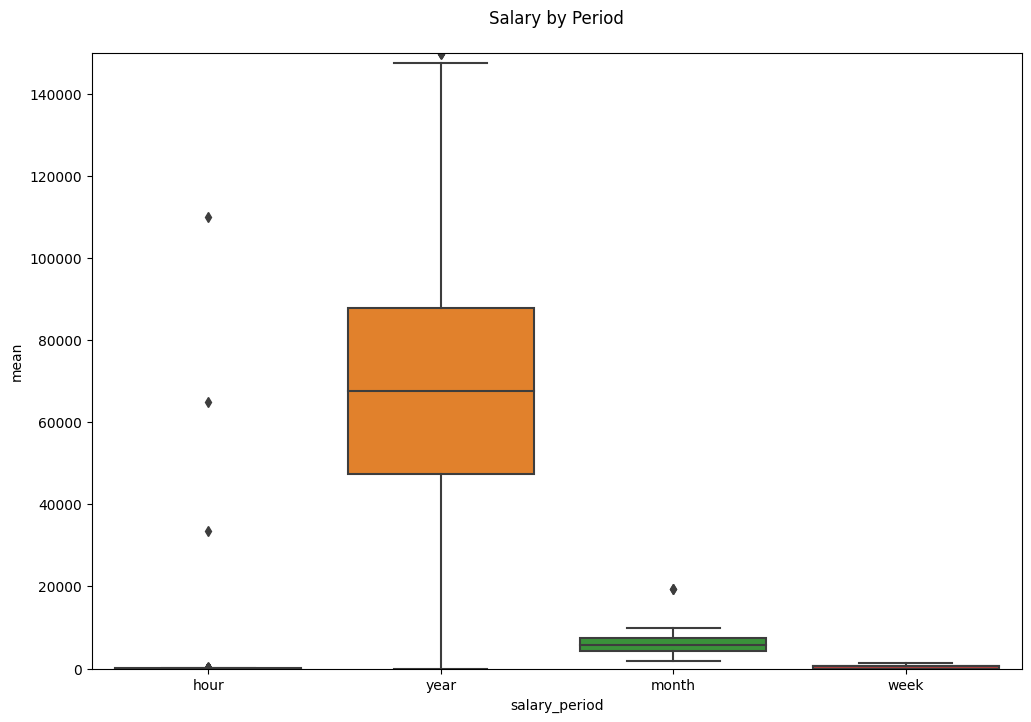

In [ ]:
# Ну вот правда не репрезентативен, и это я еще годовые выбросы обрезала
df_to_find_threshold['mean'] = (df_to_find_threshold.salary_from + df_to_find_threshold.salary_to) / 2 
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x="salary_period", y="mean", data=df_to_find_threshold)
plt.ylim([0, 150000])
plt.title("Salary by Period\n")
plt.show()

Сделайте выводы по графику и выведите правило определения, за какой период времени указана зарплата. Проверьте, что ничего не упустили.

<font color='#830560' size=3>
Для определения, за какой период времени указана зарплата в строке, используется следующая логика: возьмем найденное значение медианы по зарплате в группах. Для каждой строки либо посчитаем среднее значение (лежащее посередине между "от" и "до"), либо, если одного из значений нет, возьмем то, которое присутсвует. Теперь посчитаем разницу между этим значением и медианными значениями. С медианным значением какой группы разница меньше - к такой группе и будет отнесена текущая строка.
</font>

In [ ]:
def get_period(row):
    assert not (np.isnan(row.salary_from) & np.isnan(row.salary_to) & np.isnan(row.salary_period))
    median_salary_hwmy = [17.5, 700.0, 5708.5, 67500.0]
    row_mean = 0
    if not(np.isnan(row.salary_from) or np.isnan(row.salary_to)):
        row_mean = (row.salary_to - row.salary_from) / 2
    elif not np.isnan(row.salary_from):
        row_mean = row.salary_from
    else:
        row_mean = row.salary_to
    h_diff = abs(row_mean - median_salary_hwmy[0])
    w_diff = abs(row_mean - median_salary_hwmy[1])
    m_diff = abs(row_mean - median_salary_hwmy[2])
    y_diff = abs(row_mean - median_salary_hwmy[3])
    mn = min(h_diff, w_diff, m_diff, y_diff)
    if mn == h_diff:
        return 'hour'
    if mn == w_diff:
        return 'week'
    if mn == m_diff:
        return 'month'
    return 'year'

In [ ]:
df_idxs_to_fill_salary_period = changed_df[~changed_df[['salary_from', 'salary_to', 'salary_period']].isna().all(axis=1) & changed_df.salary_period.isna()].index
changed_df.loc[df_idxs_to_fill_salary_period, 'salary_period'] = changed_df.loc[df_idxs_to_fill_salary_period].apply(lambda row: get_period(row), axis=1)

In [ ]:
changed_df.salary_period.value_counts()

year     1720
hour     1154
month      31
week        8
Name: salary_period, dtype: int64

**Что мы можем увидеть?**

Зарплата также может быть указана в месяц (month) и в неделю (week) – учтите это при составлении общего регулярного выражения.

Также в начале некоторых строк есть лишние пробелы, которые мы также учитываем.

Разделим столбец `salary` на зарплаты от, до, временной интервал (час, месяц, год) и бонусы. Для строк не попавших ни в одну категорию или с NaN в колонке salary установим все как NaN.

Также добавим колонку которая разделяет тип предложений (от-до, от, до, нет).

<font color='#830560' size=3>
Разделение типа (от-до, от, до, нет):
</font>

In [ ]:
def row_type(row):
    if np.isnan(row.salary_from) and np.isnan(row.salary_to):
        return "no"
    if not (np.isnan(row.salary_from) or np.isnan(row.salary_to)):
        return "from-to"
    if np.isnan(row.salary_from):
        return "to"
    return "from"

In [ ]:
changed_df["salary_type"] = changed_df.apply(lambda row: row_type(row), axis=1)

In [ ]:
changed_df.salary_type.value_counts()

no         17919
from-to     2656
from         166
to            91
Name: salary_type, dtype: int64

#### Обработка колонки job_type

Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
# Чтобы не таскать всю таблицу за собой
job_type_col = changed_df[~changed_df.job_type.isna()].job_type.apply(lambda text: re.sub(r'\s+', ' ', text).strip())
job_type_col.value_counts()

Full Time                                        6442
Full Time Employee                               6357
Full Time, Employee                              3114
Full Time Temporary/Contract/Project             1010
Full Time, Temporary/Contract/Project             514
Full Time , Employee                              384
Part Time Employee                                319
Part Time                                         319
Part Time, Employee                               185
Temporary/Contract/Project                        185
Employee                                          146
Full Time / Employee                              109
Full Time , Temporary/Contract/Project             48
Per Diem, Employee                                 29
Part Time, Temporary/Contract/Project              24
Per Diem                                           22
Job Type Full Time Employee                        19
Part Time/ Temporary/Contract/Project              14
Full Time/ Employee         

Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [ ]:
job_type_time = ['Full Time', 'Part Time', 'Per Diem']
employment_type = ['Employee', 'Intern', 'Seasonal', 'Temporary/Contract/Project', 'Exempt']

Теперь видно, что тип работы состоит из двух частей: полноты занятости (Full Time, Part Time, ...) и типа занятости (Employee, Intern, ...). Встречаются неполные записи. Будем считать по умолчанию полноту занятости Full Time и тип занятости Employee и разделим эту колонку на две.

In [ ]:
# Добавление нужных колонок в виде по умолчанию
changed_df['job_type_time'] = 'Full Time'
changed_df['employment_type'] = 'Employee'

In [ ]:
# Заполнение колонок
for t in job_type_time:
    changed_df.loc[job_type_col[job_type_col.str.contains(t)].index, 'job_type_time'] = t
for e in employment_type:
    changed_df.loc[job_type_col[job_type_col.str.contains(e)].index, 'employment_type'] = e

Колонку `job_description` оставим без изменения, так как она содержит текстовое описание вакансии.

### Столбцы job_title, organization, sector

Для столбцов `job_title`, `organization` и `sector` самостоятельно выявите и реализуйте этапы анализа.

<font color='#830560' size=5>
job_title
</font>

<font color='#830560' size=3>
В job_title есть подозрительное значение Monster. Мне кажется, его стоит выбросить. Также постараюсь сделать вариативность данных поменьше путем отбрасывания локации (in где-то там), пояснений, идущих после названия работы через дефис/тире, и css-тэгов. С той же целью используется приведение всех значений к формату lower.
</font>

In [ ]:
# Было
changed_df.job_title.nunique()

18759

In [ ]:
def clean_job_title(text):
    if not isinstance(text, str) or text == 'Monster':
        return np.nan
    text = re.sub(r'in .*', '', re.sub('Job', '', text))
    text = re.sub(r'(-|–) .*', '', text)
    text = re.sub(r'{.*', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text.lower()

In [ ]:
# Стало
changed_df['job_title'] = changed_df.job_title.apply(clean_job_title)
changed_df.job_title.nunique()

11458

<font color='#830560' size=5>
organization
</font>

<font color='#830560' size=3>
При детальном рассмотрении в колонке оказалось огромное количество слипшихся значений (через запятую, через точку с запятой, просто без всего) - их можно было бы выделить и записать унифицированно (все через тчоку с запятой, например).<br>
Загвоздка в том, что подобные значения представляют собой скорее сектор, нежели организацию, поэтому искать будем не это, а названия организаций. Они содержать слова "Inc." или "Industries", "Nonprofit Charitable Organizations".
</font>

In [ ]:
sectors_not_organizations = ['Healthcare Services', 'Retail',
       'Manufacturing', 'Computer/IT Services', 'Legal Services',
       'Business Services', 'Restaurant/Food Services',
       'Food and Beverage Production', 'Insurance',
       'Transport and Storage - Materials',
       'Construction - Industrial Facilities and Infrastructure',
       'Accounting and Auditing Services', 'Biotechnology/Pharmaceuticals',
       'Education', 'Real Estate/Property Management',
       'Staffing/Employment Agencies', 'Banking', 'Computer Software',
       'Construction - Residential & Commercial/Office',
       'Automotive and Parts Mfg', 'Engineering Services',
       'Telecommunications Services', 'Automotive Sales and Repair Services',
       'Aerospace and Defense', 'Energy and Utilities', 'Hotels and Lodging',
       'Financial Services', 'Government and Military',
       'Security and Surveillance', 'Nonprofit Charitable Organizations',
       'Medical Devices and Supplies',
       'Management Consulting Services', 'Travel, Transportation and Tourism',
       'Advertising and PR Services', 'Computer Hardware',
       'Printing and Publishing', 'Consumer Packaged Goods Manufacturing',
       'Electronics, Components, and Semiconductor Mfg',
       'Chemicals/Petro-Chemicals', 'Internet Services',
       'Architectural and Design Services', 'Wholesale Trade/Import-Export',
       'Agriculture/Forestry/Fishing',
       'Entertainment Venues and Theaters',
       'Personal and Household Services',
       'Waste Management', 'Metals and Minerals',
       'Sports and Physical Recreation',
       'Broadcasting, Music, and Film',
       'Rental Services']


# Сначала я думала, что логичнее будет выделять самые частые значения
def get_organizations(text):
    if not isinstance(text, str):
        return np.nan
    orgs = [org for org in sectors_not_organizations if re.search(org, text)]
    return ';'.join(orgs) if len(orgs) > 0 else np.nan


# А потом поняла, что они не имеют никакого отношения к "организации", и искать нужно другое
def get_organizations(text):
    if not isinstance(text, str):
        return np.nan
    if re.search(r'(Inc.|Industries|Organization)', text):
        if re.search(r'Nonprofit Charitable Organizations', text):
            return 'Nonprofit Charitable Organizations'
        return text
    return np.nan

In [ ]:
# Новая колонка, старая остается, так как содержит потенциально полезную информацию
changed_df['organizations'] = changed_df.organization.apply(get_organizations)

In [ ]:
changed_df.organizations.value_counts()

Nonprofit Charitable Organizations                                        122
Altec Industries                                                            8
Valmont Industries Inc.                                                     4
Ware Industries                                                             2
Signal Metal Industries                                                     2
Goodwill Industries                                                         2
Ernie Green Industries, Inc.                                                2
Bisco Industries                                                            2
Accudyne Industries                                                         1
Shiloh Industies, Inc.                                                      1
Brennan Industries                                                          1
Newport News Shipbuilding, a division of Huntington Ingalls Industries      1
Barrow Industries                                               

<font color='#830560' size=5>
sector
</font>

<font color='#830560' size=3>
В колонке много слипшихся значений (через запятую, через точку с запятой, просто без всего) - их нужно выделить и записать унифицированно (все через точку с запятой). Критерий для выделения составляющих - частота встречаемости.<br>
В колонке также присутствуют такие значения, как 'Experienced (Non-Manager)', 'Manager (Manager/Supervisor of Staff)' и 'Entry Level'. Они не имеют отношения к сектору, поэтому вынесем их в отдельную колонку position.
</font>

In [ ]:
positions = ['Experienced (Non-Manager)', 'Entry Level', 'Manager (Manager/Supervisor of Staff)',
            'Executive (SVP, VP, Department Head, etc)', 'Student (High School)', 'Student (Undergraduate/Graduate)',
            'Student', 'Senior Executive (President, CFO, etc)', 'Career Level Experienced (Non-Manager)']

sectors = ['Medical/Health', 'IT/Software Development',
          'Sales', 'Retail', 'Business Development', 'Project/Program Management',
          'Accounting/Finance', 'Insurance', 'Food Services', 'Hospitality',
          'Installation/Maintenance/Repair',
          'Manufacturing', 'Production/Operations', 'Logistics/Transportation',
          'Security/Protective Services', 'Customer Support/Client Care',
          'Marketing/Product', 'Quality Assurance/Safety',
          'Administrative/Clerical', 'Legal', 'Human Resources', 'Engineering',
          'Business/Strategic Management', 'Biotech', 'R&D/Science',
          'Education', 'Brokerage', 'Nursing',
          'Building Construction/Skilled Trades',
          'Environmental/Geological Testing & Analysis',
          'Banking/Real Estate/Mortgage Professionals',
          'Editorial/Writing', 'Dental Practitioner', 'Human Resources',
          'Creative/Design', 'Network Security', 'Laboratory/Pathology',
          'Telecommunications Administration/Management']


def get_sectors(text):
    if not isinstance(text, str):
        return np.nan
    secs = [sec for sec in sectors if re.search(sec, text)]
    return ';'.join(secs) if len(secs) > 0 else np.nan

In [ ]:
changed_df['position'] = np.nan
for p in positions:
    changed_df.loc[changed_df[changed_df.sector.str.contains(p, regex=False).fillna(False)].index, 'position'] = p

In [ ]:
# sanity check
changed_df.position.value_counts()

Experienced (Non-Manager)                    4299
Entry Level                                  1145
Manager (Manager/Supervisor of Staff)         874
Student                                        87
Executive (SVP, VP, Department Head, etc)      62
Career Level Experienced (Non-Manager)          6
Senior Executive (President, CFO, etc)          6
Name: position, dtype: int64

In [ ]:
# Новая колонка, старая остается, так как содержит потенциально полезную информацию
changed_df['sectors'] = changed_df.sector.apply(get_sectors)

### Краткая статистика очищенных данных

Проанализируйте результаты обработки данных. 
1. Сравните, что было до и после.
2. Определите, какие еще этапы можно было бы включить. Выберите один и реализуйте его. Если на ваш взгляд, текущего состояния достаточно, определите, какие задачи можно решать с помощью обработанного датасета и опишите этапы обработки, которые для них могут понадобиться.

<font color='#830560' size=3>
Логичнее будет сначала включить еще какие-либо этапы обработки, а потом сравнивать.
</font>

<font color='#830560' size=3>
Из того, что мне приходит в голову касательно обработки, - более качественно разобраться с колонкой job_title, а также попробовать извлечь информацию из job_description. И то, и другое нужно делать с привлечением NLP-шных алгоритмов.<br>
Можно дополнительно проанализировать столбцы organization и sector, потому что они содержат похожую информацию, и в перспективе объединить их в один, который будет более корректно отражать сектор.<br>
И попроще (то, что я буду реализовывать): в некоторых строках organization лежит location. Можно вытащить оттуда все возможные данные. Опустим тот факт, что эту часть анализа стоило сделать половину колаба назад. Я не додумалась тогда.<br>
</font>

In [ ]:
location_col = changed_df.organization[~changed_df.organization.isna()]

In [ ]:
# Не все штаты лежат в качестве аббревиатур, надо исправить
us_state_to_abbrev = {"Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO", "Connecticut": "CT",
"Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
"Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
"Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
"North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
"South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV",
"Wisconsin": "WI", "Wyoming": "WY", "District of Columbia": "DC", "American Samoa": "AS", "Guam": "GU", "Northern Mariana Islands": "MP",
"Puerto Rico": "PR", "United States Minor Outlying Islands": "UM", "U.S. Virgin Islands": "VI"}

for us_state, abbrev in us_state_to_abbrev.items():
    location_col = location_col.str.replace(us_state, abbrev)

# Разовое удаление лишних пробелов 
location_col = location_col.apply(lambda text: re.sub(r'\s+', ' ', text).strip()) 

In [ ]:
# Город + код штата + индекс
city_state_index = location_col[location_col.str.fullmatch(r'[A-Za-z .\-/]+(?:(?:\s*,\s*)|\s)[A-Za-z]{2}(?:(?:\s*,\s*)|\s)\d{5}')]
location_col = location_col[~location_col.isin(city_state_index)]

# Город + код штата
city_state = location_col[location_col.str.fullmatch(r'[A-Za-z .\-/]+(?:(?:\s*,\s*)|\s)[A-Za-z]{2}')]
location_col = location_col[~location_col.isin(city_state)]

# Индекс
index_only = location_col[location_col.str.fullmatch(r'\d{5}')]
location_col = location_col[~location_col.isin(index_only)]

# Код штата
state_only = location_col[location_col.str.fullmatch(r'[A-Za-z]{2}')]
location_col = location_col[~location_col.isin(state_only)]

# Город + индекс
city_index = location_col[location_col.str.fullmatch(r'[A-Za-z .\-/]+\d{5}')]

In [ ]:
# Доказательство, что данные действительно находятся
len(city_state_index)

125

In [ ]:
# Проход по всем найденным блокам с вытаскиванием значений и занесением их в таблицу
temp_df = city_state_index.str.extract(r'([A-Za-z .\-/]+)(?:(?:\s*,\s*)|\s)([A-Za-z]{2})(?:(?:\s*,\s*)|\s)(\d{5})')
changed_df.loc[temp_df.index, 'city'] = temp_df[0]
changed_df.loc[temp_df.index, 'state'] = temp_df[1].apply(lambda text: text.upper())
changed_df.loc[temp_df.index, 'index'] = temp_df[2]

temp_df = city_state.str.extract(r'([A-Za-z .\-/]+)(?:(?:\s*,\s*)|\s)([A-Za-z]{2})')
changed_df.loc[temp_df.index, 'city'] = temp_df[0]
changed_df.loc[temp_df.index, 'state'] = temp_df[1].apply(lambda text: text.upper())

temp_df = index_only.str.extract(r'(\d{5})')
changed_df.loc[temp_df.index, 'index'] = temp_df[0]

temp_df = state_only.str.extract(r'([A-Za-z]{2})')
changed_df.loc[temp_df.index, 'state'] = temp_df[0].apply(lambda text: text.upper())

temp_df = city_index.str.extract(r'([A-Za-z .\-/]+)(\d{5})')
changed_df.loc[temp_df.index, 'city'] = temp_df[0]
changed_df.loc[temp_df.index, 'index'] = temp_df[1]

In [ ]:
# Sanity check - если адрес имеет несуществующий код штата, значит, туда попал мусор
not_ok = changed_df[~(changed_df.state.isin(us_state_to_abbrev.values())|changed_df.state.isna())]
changed_df.loc[not_ok.index, 'city'] = np.nan
changed_df.loc[not_ok.index, 'state'] = np.nan
changed_df.loc[not_ok.index, 'index'] = np.nan

<font color='#830560' size=3>
Теперь можно удалить некоторые ставшие ненужными исходные колонки и проанализировать результат.
</font>

In [ ]:
changed_df.drop(columns=['job_type', 'location', 'salary', 'sector', 'organization'], inplace=True)
changed_df.rename(columns={'sectors': 'sector', 'organizations': 'organization'}, inplace=True)

<font color='#830560' size=3>
Было:
</font>

In [ ]:
init_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   date_added       122 non-null    object
 3   has_expired      22000 non-null  object
 4   job_board        22000 non-null  object
 5   job_description  22000 non-null  object
 6   job_title        22000 non-null  object
 7   job_type         20372 non-null  object
 8   location         22000 non-null  object
 9   organization     15133 non-null  object
 10  page_url         22000 non-null  object
 11  salary           3446 non-null   object
 12  sector           16806 non-null  object
 13  uniq_id          22000 non-null  object
dtypes: object(14)
memory usage: 2.3+ MB


In [ ]:
init_df.sample(5)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
17628,United States of America,US,NaN,No,jobs.monster.com,L2 BMC Technologist:Position Description:This ...,Senior BMC Technologist Job in Dallas,Full Time,"Dallas, TX",NaN,http://jobview.monster.com/Senior-BMC-Technolo...,NaN,Experienced (Non-Manager),32dcc555ca18b7d34a62ab7cd5a69b84
11414,United States of America,US,NaN,No,jobs.monster.com,JR. INFOSEC AUDIT ANALYST – CONTRACT TO PERM –...,Jr. InfoSec Audit Analyst Job in Dallas,Full Time Temporary/Contract/Project,"Dallas, TX",Accounting and Auditing ServicesComputer/IT Se...,http://jobview.monster.com/jr-infosec-audit-an...,18.00 - 20.00 $ /hour,IT/Software Development,2c0f525274b36e23f01d85b5fd7528e6
7535,United States of America,US,NaN,No,jobs.monster.com,THE DIAGNOSTIC and TREATMENT CENTERA Service o...,Cardiovascular Sonographer Job in Madison,Employee,"Madison, WI 53715",All,http://jobview.local-jobs.monster.com/Cardiova...,NaN,NaN,bca12ac23a8e232d548f5d975db791ec
10265,United States of America,US,NaN,No,jobs.monster.com,RAC Planning Staff Representative - Customer S...,RAC Planning Staff Representative - Customer S...,Full Time / Employee,"Estero, FL",NaN,http://jobview.monster.com/RAC-Planning-Staff-...,NaN,Manufacturing/Production/Operations,be97782e09d2a6c2bd687b978530989d
4433,United States of America,US,NaN,No,jobs.monster.com,The Helen Ross McNabb Center (www.mcnabbcent...,Knox C&Y IST Program Coordinator Masters Clini...,Full Time,"Knoxville, TN 37917",Healthcare Services,http://jobview.monster.com/knox-c-y-ist-progra...,NaN,Medical/Health,a91921cbf667da7a7b3a109a712fe8a2


In [ ]:
pd.concat([init_df.dtypes.to_frame('Data type'), init_df.isna().sum().to_frame('Count NaN'), init_df.nunique().to_frame('Count unique')], axis=1).T

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
Data type,object,object,object,object,object,object,object,object,object,object,object,object,object,object
Count NaN,0,0,21878,0,0,0,0,1628,0,6867,0,18554,5194,0
Count unique,1,1,78,1,1,18744,18759,39,8423,738,22000,1737,163,22000


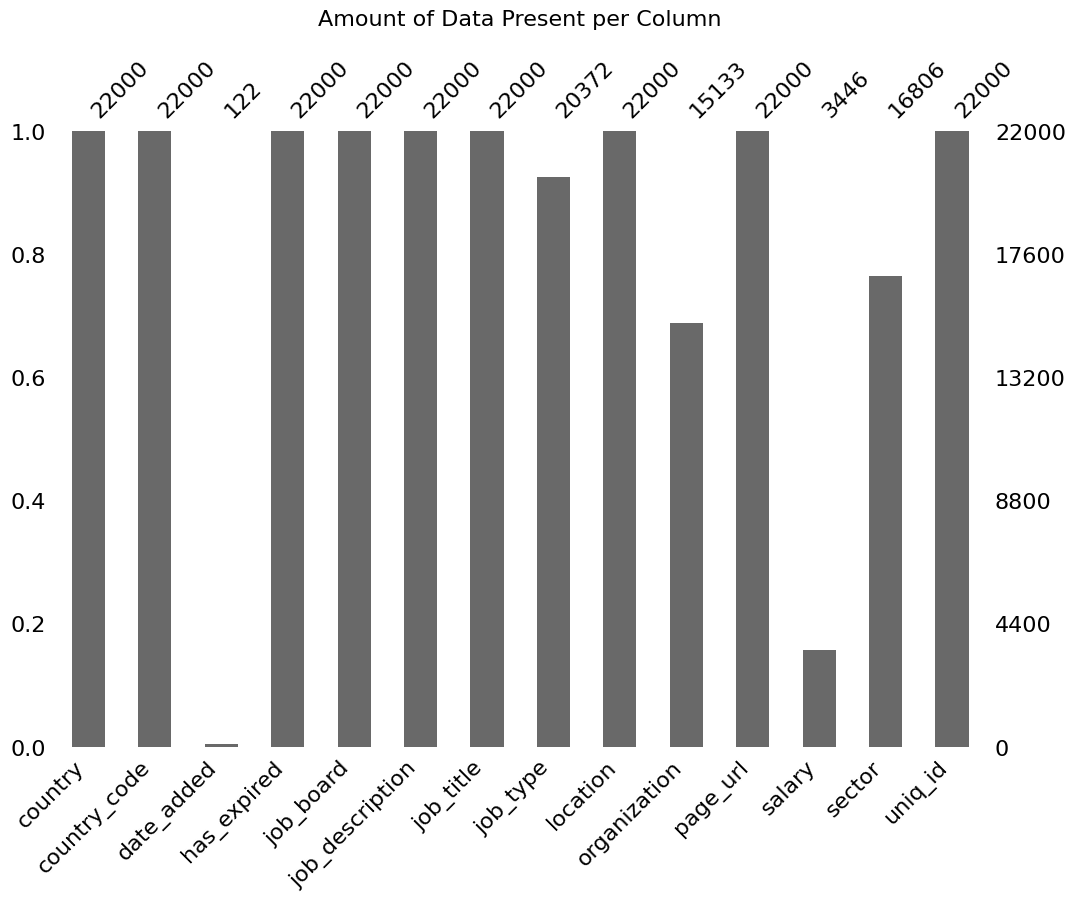

In [ ]:
msno.bar(init_df, figsize=(12, 8))
plt.title('Amount of Data Present per Column\n', fontsize=16)
plt.show()

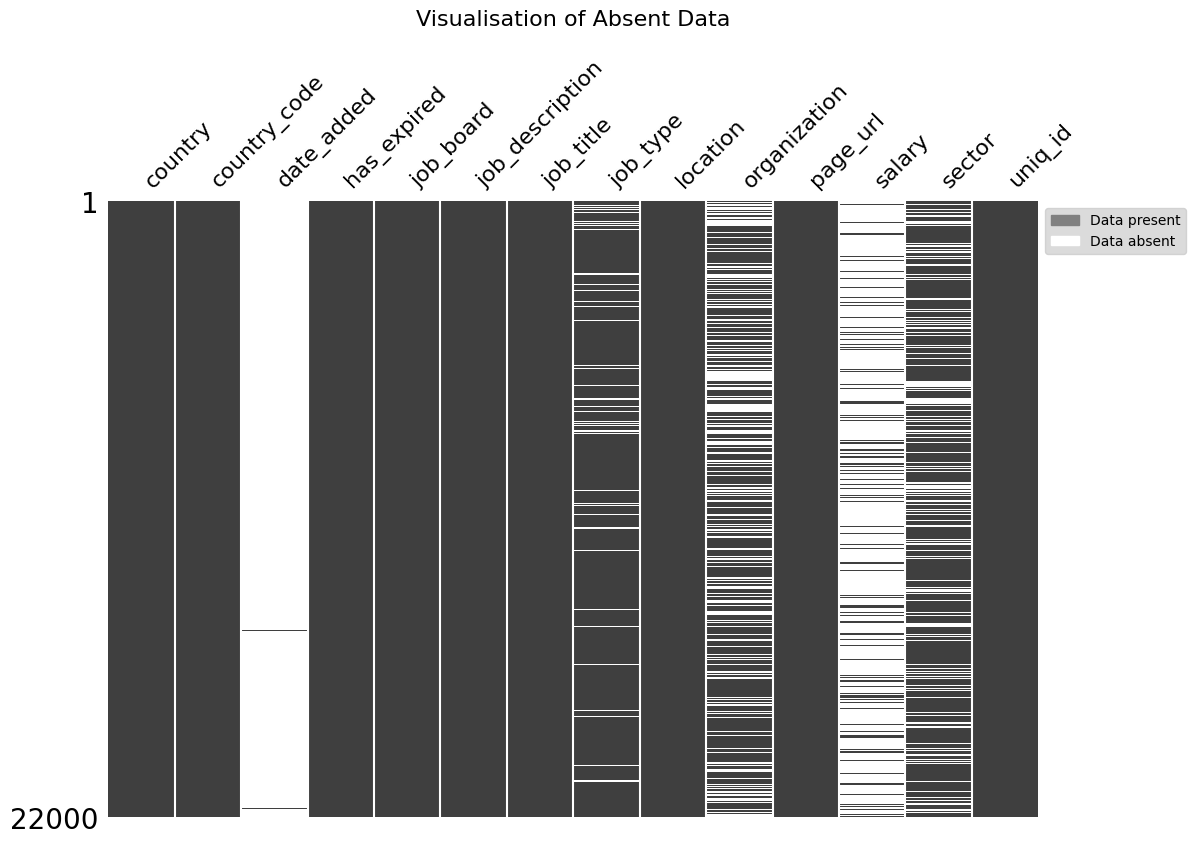

In [ ]:
msno.matrix(init_df, figsize=(12, 8), sparkline=False)
gray_patch = matplotlib.patches.Patch(color='gray', label='Data present')
white_patch = matplotlib.patches.Patch(color='white', label='Data absent')
plt.legend(handles=[gray_patch, white_patch], bbox_to_anchor=[1, 1], facecolor='lightgray')
plt.title('Visualisation of Absent Data\n', fontsize=16)
plt.show()

<font color='#830560' size=3>
Стало:
</font>

In [ ]:
changed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20832 entries, 0 to 20831
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_description  20832 non-null  object 
 1   job_title        20532 non-null  object 
 2   city             18213 non-null  object 
 3   state            18109 non-null  object 
 4   index            11589 non-null  object 
 5   salary_from      2822 non-null   float64
 6   salary_to        2747 non-null   float64
 7   salary_period    2913 non-null   object 
 8   salary_bonus     20832 non-null  bool   
 9   salary_type      20832 non-null  object 
 10  job_type_time    20832 non-null  object 
 11  employment_type  20832 non-null  object 
 12  organization     159 non-null    object 
 13  position         6479 non-null   object 
 14  sector           9319 non-null   object 
dtypes: bool(1), float64(2), object(12)
memory usage: 2.2+ MB


In [ ]:
changed_df.sample(5)

,job_description,job_title,city,state,index,salary_from,salary_to,salary_period,salary_bonus,salary_type,job_type_time,employment_type,organization,position,sector
6500,St. Louis Community College is a multi-campus ...,learning experience consultant,Saint Louis,MO,63102,NaN,NaN,NaN,False,no,Full Time,Employee,NaN,NaN,Education
10812,ENTRY LEVEL Customer Service and Sales positio...,customer service and sales,Manayunk,PA,NaN,NaN,NaN,NaN,False,no,Full Time,Employee,NaN,NaN,Customer Support/Client Care
16022,Report this job About the Job NO C2C please . ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,no,Full Time,Employee,NaN,NaN,NaN
12115,Position ID# 59622 # Positions 1 State MS C...,shift supervisor,Camphill,PA,NaN,NaN,NaN,NaN,False,no,Full Time,Employee,NaN,NaN,Project/Program Management
7659,SALES & SERVICE SPECIALIST We are Talbots! Do ...,sales & service in,TN,NaN,37922,NaN,NaN,NaN,False,no,Full Time,Employee,NaN,Student,NaN


In [ ]:
pd.concat([changed_df.dtypes.to_frame('Data type'), changed_df.isna().sum().to_frame('Count NaN'), changed_df.nunique().to_frame('Count unique')], axis=1).T

,job_description,job_title,city,state,index,salary_from,salary_to,salary_period,salary_bonus,salary_type,job_type_time,employment_type,organization,position,sector
Data type,object,object,object,object,object,float64,float64,object,bool,object,object,object,object,object,object
Count NaN,0,300,2619,2723,9243,18010,18085,17919,0,0,0,0,20673,14353,11513
Count unique,18744,11458,2938,53,4391,373,399,4,2,4,3,5,23,7,48


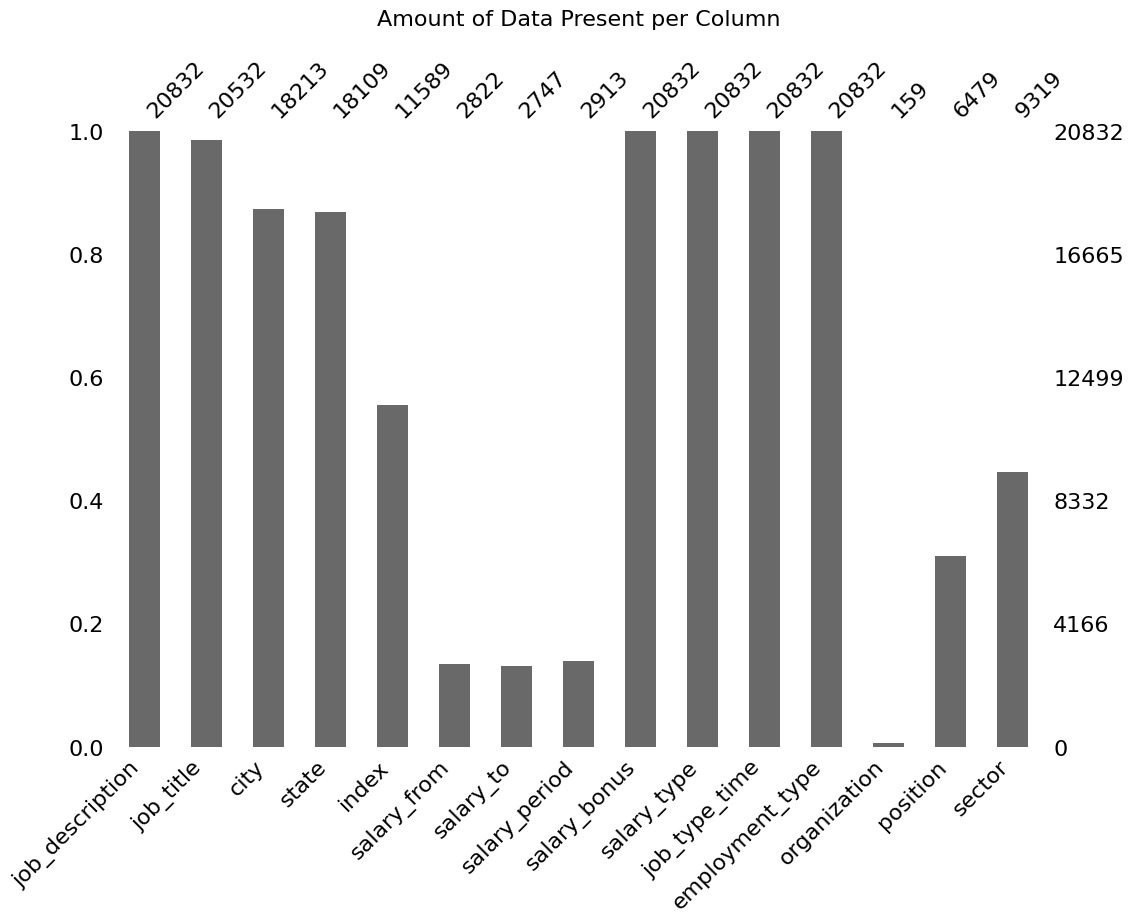

In [ ]:
msno.bar(changed_df, figsize=(12, 8))
plt.title('Amount of Data Present per Column\n', fontsize=16)
plt.show()

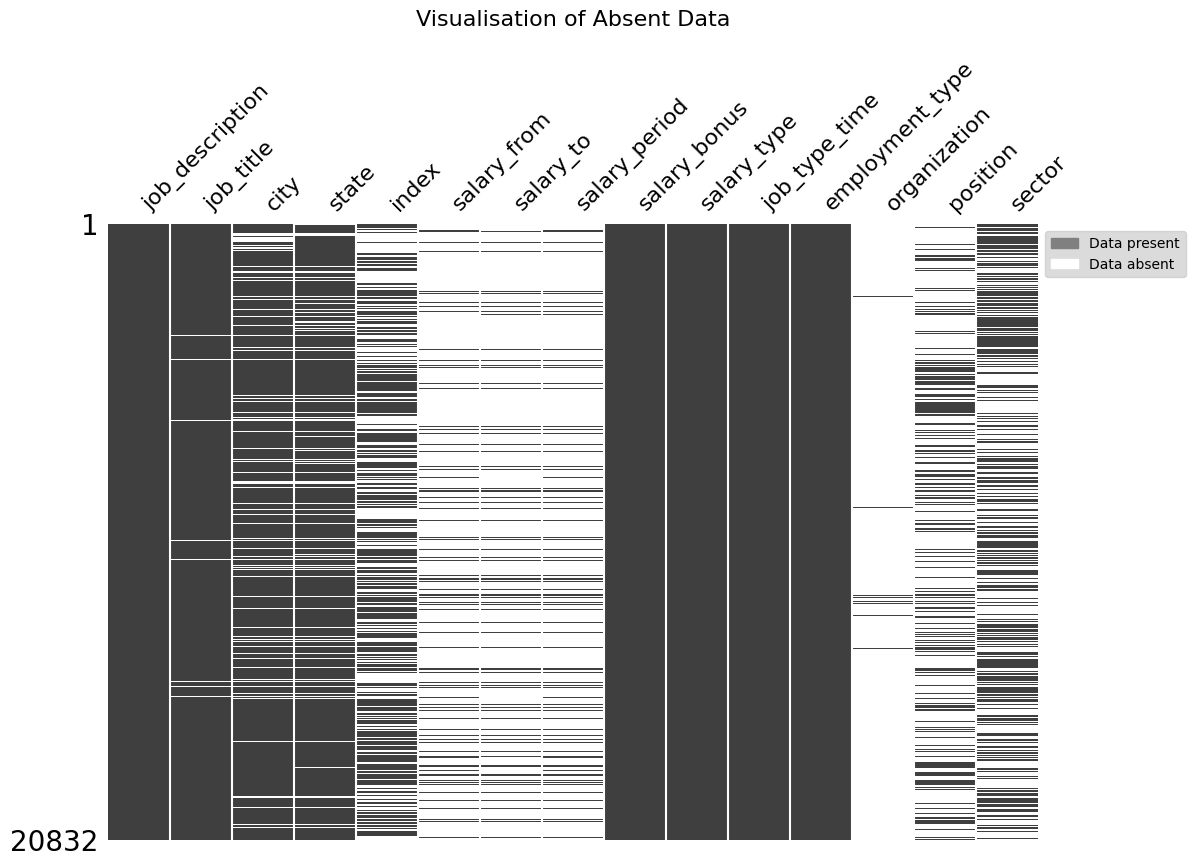

In [ ]:
msno.matrix(changed_df, figsize=(12, 8), sparkline=False)
gray_patch = matplotlib.patches.Patch(color='gray', label='Data present')
white_patch = matplotlib.patches.Patch(color='white', label='Data absent')
plt.legend(handles=[gray_patch, white_patch], bbox_to_anchor=[1, 1], facecolor='lightgray')
plt.title('Visualisation of Absent Data\n', fontsize=16)
plt.show()

<font color='#830560' size=3>
С одной стороны, данных стало меньше, а пропущенных значений - больше. С другой стороны, количество перешло в качество. Мусор, лежавший в датасете, стал чуть менее мусором.<br>
Говоря о задачах, которые можно решать с помощью данного датасета, вряд ли бы я вообще стала его использовать. Он прекрасен в своей ужастности и, вероятно, можно погуглить и найти аналогичный более хороший датасет. Здесь из полезного есть данные о зарплатах (хотя их мало) по секторам и штатам. Можно посчитать статистики. Также можно рассмотреть связь зарплаты и позиции, которую человек занимает. 
</font>

# <font color='#830560' size=5>
Выводы (для себя):
</font>

<font color='#830560' size=3>
Во-первых, missingno - уродская библотека, у которой не унифицированный интерфейс у функций.<br>
Во-вторых, НЕ УДАЛЯЕМ никакие данные, пока не дошли до самого конца, если они потенциально могут содержать полезную информацию. А вот в конце удаляем всё лишнее, так как к задаче больше не вернемся. Также не стоит делать какие-то действия над исходными данными. Всегда лучше создать копию и тыкаться в ней. При четком разделении задачи на подзадачи имеет смысл создавать отдельную копию для каждой подзадачи и писать код так, чтобы шаги обработки можно было выполнять независимо друг от друга.<br>
В-третьих, нужно быть очень осторожной с регулярками, когда подставляешь в них значения. Как говорится, одна ошибка - и ты ошибся. Скобки, слэши, точки и т.п. могут привести к тому, что ты полчаса будешь смотреть на одну ячейку с кодом, не понимая, что не так.<br>
В-четвертых, лучше потратить полдня на поиск хорошего датасета под свою задачу, чем потратить неделю на обработку плохого.<br>
В-пятых, мозг нужно включать хотя бы иногда. Не всегда самое очевидное решение - правильное.<br>
</font>

<font color='#830560' size=3>
И jff небольшой мем про то, как я пыталась нагуглить "восстановление данных с помощью коэффициента корреляции", насмотревшись каких-то умных видео про это.
</font>

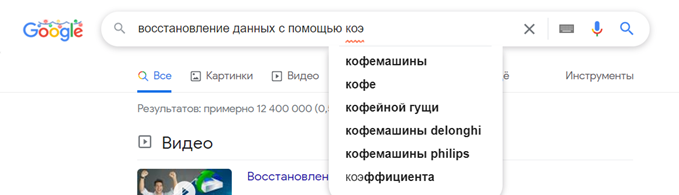